## Assignment Overview: 

In this assignment, you will be running exploratory analysis on a dataset to better understand it and its features. You will be processing and preparing the data to apply the machine learning knowledge you’ve obtained through thelectures.This will include creating, analysing and generating predictions with regression models.
You are expected to primarily use Scikit-Learn in the assignment.  

Data Set: The data set provided for this assignment contains information on many different car types and their prices. This assignment challenges you to predict the sale price of each car.

Data is in CSV format and has already been split into training and test sets for your convenience: train.csv: the training set, test.csv: the test set. 
 

In [1]:
# python version: python3
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("training.csv") 

In [2]:
train.shape

(164, 23)

## DATA PREPARATION

In the first part of the assignment, you will analyze the dataset and preprocess it in order to prepare it for using machine learning algorithms. In this data set, our target variable is “price” while the others are our features. 

### part a

**Split your data into X and y:**
As mentioned, “price” column is our dataset target. Create two pandas data frames using train.csv, one containing all the input features and the other containing the target label only. Name these data frames as **train_x_a** and **train_y** respectively. 

In [3]:
#divide training.csv into train_x_a and train_y data frames
train_x_a =train.drop(columns = 'price')
train_y = train['price']

In [4]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [5]:
train_y.head(2)

0    15985.0
1     7349.0
Name: price, dtype: float64

### part b

**Handling missing values:**
Find all features (columns) that contain missing (NaN) values. Store these column names in a list called **nan_columns**. Fill the missing values with the median value of the corresponding feature. Save your resulting data frame as **train_x_b**. 
(Note that if there are any missing values in the target i.e. price column, drop the corresponding row completely from train_x and train_y)  

In [6]:
#Columns that have missing values
nan_columns = train.columns[train.isnull().any()] 
#fill w/ median
train_x_b=train_x_a.fillna(train_x_a.median())

In [7]:
print(nan_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [8]:
#finding nan values indices in column 'price'
null_prices=train_y[train_y.isnull()].index.tolist()
null_prices

[18, 37, 47, 69, 71, 81, 82, 100, 107]

In [9]:
#drop the nan value rows from train_y
train_y.drop(null_prices, inplace = True)

In [10]:
#drop the nan value rows from train_x_b
train_x_b.drop(null_prices, inplace = True)

In [11]:
train_x_b.shape 

(155, 22)

In [12]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [13]:
train_y.head(2)

0    15985.0
1     7349.0
Name: price, dtype: float64

### part c

**Handling categorical variables:**
Find all features (columns) that contain categorical values (strings). Store these column names in a list called categorical_columns.  (For example, if the data has a column titled ‘gender’ with ‘female’ and ‘male’ values, then ‘gender’ should be in the **categorical_columns** list.) 

In [14]:
#finding all categorical value columns
categorical_columns = list(train_x_b.select_dtypes(include = ['object']))

In [15]:
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### part d

In [16]:
#Convert categorical value columns into dummy variable columns
train_x_d = pd.get_dummies(train_x_b)

In [17]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.2,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


### part e

**Standard scaling:**
Scale all columns in train_x_d with standardization. Name the new dataframe with scaled values as **train_x_e**.
(Note: Sk Learn provides a transformer called StandardScaler for standardization. The output of the scaler is a numpy array. You need to convert it dataframe after standardization. Don’t forget to add the original data frame’s indices and columns to the new data frame.) 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Only fit the scaler, not fit_transform. This is so we can use the same scaler for the test data.
scaler.fit(train_x_d)
train_x_e = scaler.transform(train_x_d)
#Array to DataFrame
train_x_e = pd.DataFrame(train_x_e)
train_x_e.columns = train_x_d.columns

In [19]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


## Data Exploration

In this part of the assignment, you are going to calculate and visualize certain features of your dataset to understand it better. This is an important step before modelling to find out any problems there might be with your data. 

### part f

**Visualize variable distributions:**
Plot the histogram of each of the variables in your dataset. Try to understand how each variable is distributed.  Are there any extreme points in these distributions? 

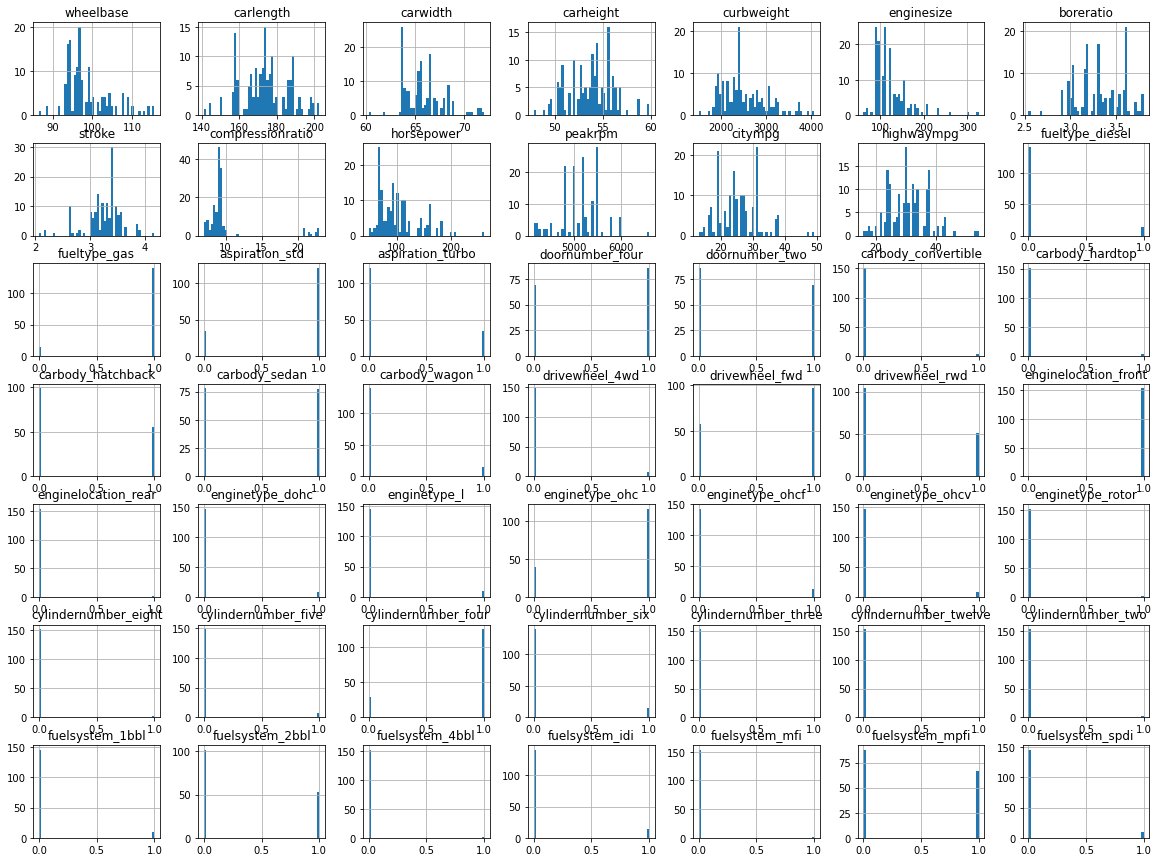

In [20]:
#ploting histograms
import matplotlib.pyplot as plt
train_x_d.hist(bins=50, figsize=(20,15))
plt.show()

### part g

**Calculate correlation:**
Calculate the correlation score between all continuous variables in your dataset and the target. Get the strongest 5 correlating variables (top 5 **absolute** correlations) and store the names in a list called **top_5_corr**. 

**Note:**  *Correlation will help you understand the relation between a variable and the target. If they move in the same direction (up or down) at the same time, they have high correlation* .   

In [21]:
#Top 5 correlation with price
combine = pd.concat([train_y, train_x_d], axis=1)
top_5_corr = combine.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:6]

In [22]:
print(top_5_corr)

enginesize    0.873041
curbweight    0.825945
horsepower    0.799281
carwidth      0.726373
carlength     0.707716
Name: price, dtype: float64


### part h

**Scatter plot:** Plot each of the 5 variables you found in the previous question ​(f)​ against each other. These plots should form a matrix with 5 x 5 plots.  

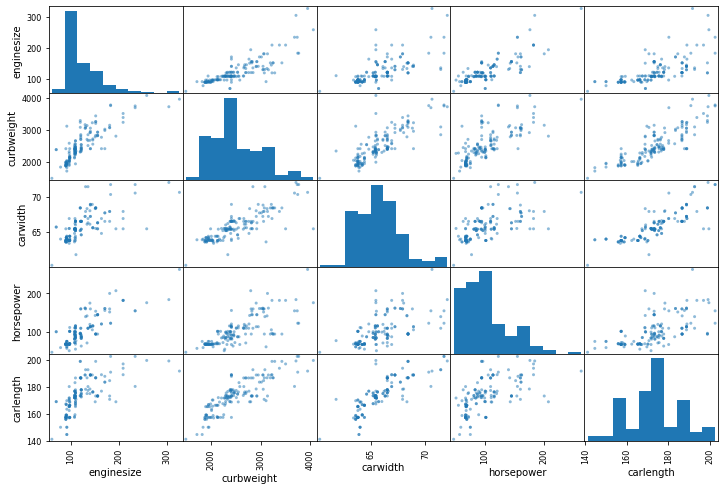

In [23]:
#Scatter matrix of top 5 corr variables
from pandas.plotting import scatter_matrix

top5_columns = ["enginesize", "curbweight", "carwidth",
              "horsepower", "carlength"]
plot_5x5 = scatter_matrix(train_x_b[top5_columns], figsize=(12, 8))

## LINEAR REGRESSION TO PREDICT CAR PRICES

In this part of the assignment, you are going to train a Linear Regression model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from cross_val_score or GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. **To obtain MSE, get the absolute value**. 

### part i

**Create a model:** Create a Linear Regression model with default parameters. Train the model with train_x_e and train_y. Print the Mean Square Error (MSE) for training data. 

In [24]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_x_e, train_y)
train_pred = lr_model.predict(train_x_e) 

# R^2 score
lr_model.score(train_x_e, train_y) 

0.9277429368880095

In [25]:
#Calcuate Mean Squared Error 
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_y, train_pred)
lin_mse

4292176.310954016

### part j

**Validate your model:** Perform 5-fold cross validation with training data and print MSE score for each fold and their average (mean) 

In [26]:
# 5-fold cross validation with training data and MSE score for each fold 
from sklearn.model_selection import cross_val_score
train_mse_score = abs(cross_val_score(lr_model, train_x_e, train_y, cv=5, scoring = 'neg_mean_squared_error'))
print(train_mse_score)

[1.00747010e+07 6.93536026e+06 8.00690789e+06 1.14919549e+07
 8.11329793e+31]


In [27]:
#average of MSE
average_mse = train_mse_score.mean()
print(average_mse)

1.622659585240769e+31


### part k

**Test your model:** Using test.csv, create **test_x** that has all the features except our target “price” and **test_y** that has only “price”. Fill missing values in test_x with median value, perform feature scaling and apply one hot encoding to categorical values, same as what you did in the first part of the assignment.  (Note that transformations you apply to the test set **should be same** as the one applied to training set. When filling the missing values, the median value should be the one computed for the training set. Similarly, in standardization, the mean and the standard deviation should be the ones from the 
training set.) 

In [28]:
test = pd.read_csv("test.csv")

#divide test.csv into test_x and test_y data frames
test_x = test.drop(columns = 'price')
test_y = test['price']

In [29]:
test_x.shape

(41, 22)

In [30]:
test_y.shape

(41,)

In [31]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,NaN,27.0,33.0


In [32]:
test_y.head(2)

0    18920.0
1    10295.0
Name: price, dtype: float64

In [33]:
#Columns that have missing values
nan_columns = test_x.columns[test_x.isnull().any()]
print(nan_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')


In [34]:
#filling missing values with median
test_x.fillna(train_x_a.median(), inplace = True)

In [35]:
test_x.isnull().any()

fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
dtype: bool

In [36]:
#finding nan values indices in column 'price'
null_prices=test_y[test_y.isnull()].index.tolist()
null_prices

[10]

In [37]:
#drop the nan value rows from test_y
test_y=test_y.drop(null_prices)

In [38]:
#drop the nan value rows from test_x
test_x=test_x.drop(null_prices)

In [39]:
test_x.shape

(40, 22)

In [40]:
#Convert categorical value columns into dummy variable columns
test_x = pd.get_dummies(test_x)
test_x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,105.8,192.7,71.40,55.7,2954.0,136.0,3.19,3.400,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,96.5,175.4,62.50,54.1,2372.0,110.0,3.15,3.580,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0
2,106.7,187.5,70.30,54.9,3495.0,183.0,3.58,3.640,21.5,123.0,...,0,0,0,0,0,0,1,0,0,0
3,113.0,199.6,69.60,52.8,4066.0,258.0,3.63,4.170,8.1,176.0,...,0,0,0,0,0,0,0,0,1,0
4,89.5,168.9,65.00,51.6,2756.0,194.0,3.74,2.900,9.5,207.0,...,0,0,0,0,0,0,0,0,1,0
5,98.4,176.2,65.60,53.0,2975.0,146.0,3.62,3.500,9.3,116.0,...,0,0,0,0,0,0,0,1,0,0
6,120.9,208.1,71.70,56.7,3900.0,308.0,3.80,3.350,8.0,184.0,...,0,0,0,0,0,0,0,1,0,0
7,99.4,176.6,66.40,54.3,2824.0,136.0,3.19,3.400,8.0,115.0,...,0,0,0,0,0,0,0,0,1,0
8,110.0,190.9,70.30,56.5,3515.0,183.0,3.58,3.640,21.5,123.0,...,0,0,0,0,0,0,1,0,0,0
9,107.9,186.7,68.40,53.9,3075.0,120.0,3.46,3.190,8.4,97.0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
from sklearn.preprocessing import StandardScaler
 
# Use already fitted standard scaler from training data.
test_x = scaler.transform(test_x)
# Array to Data frame
test_x = pd.DataFrame(test_x)
test_x.columns = train_x_d.columns
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.311385,1.529613,2.799691,0.885315,0.874435,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.368190,0.148909,-1.654180,0.177976,-0.279379,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,-0.080582,-0.080582,-0.114332,4.027682,-0.720838,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


### part l

**Predict on test set:**
Predict the prices of cars in **test_x** data using your linear regression model that you created in **(i)**. Store the predicted values in a variable named **predicted_values**. Print the test set MSE of your model.  Also, print you model’s coefficients.  
 

In [42]:
#Prediction of prices in linear regression model
predicted_values = lr_model.predict(test_x)

In [43]:
print(predicted_values[:5])

[18554.77010865  9031.0147581  26908.77122515 30993.72220886
 36895.82826145]


In [44]:
#tes mean squared error
test_mse_score = mean_squared_error(test_y, predicted_values)
print(test_mse_score)

14531000.728470773


In [45]:
#linear regression model coefficients
lr_model.coef_

array([ -184.24472871,    14.47626646,   482.17978871,   106.79417743,
        1605.85000465,  4250.28132938,   -38.5144245 , -1320.99185664,
         384.95149718,  1307.70626385,   516.79897248,  -655.36521143,
         910.41774697,    63.02307834,   -63.02307834,  -344.5423148 ,
         344.5423148 ,   -79.5712865 ,    79.5712865 ,   308.9091365 ,
          42.38074834,  -351.28103931,   212.70835533,    25.62446937,
        -101.26915341,   -54.49441723,   100.88060996,  -267.88274778,
         267.88274778,  -372.30735501,  -187.67667661,  1177.01033875,
         -83.86942363, -1726.71466479,   176.77585142,  1598.83361352,
        -137.91397032,  -996.7544254 ,   567.63022553,   430.93152627,
        -314.48820016,   176.77585142,   130.21711793,   -60.72778176,
         176.77585142,    63.02307834,  -118.99219745,   183.01542544,
        -516.53340601])

### part m

**Polynomial Features:**
Some of the features within the dataset may have a polynomial relation with the target. In order to account for this, run a polynomial transformation with degree 2 on **train_x_e** and store the result in a variable called **train_x_m**. Create a Linear Regression model with default parameters and perform 5-fold cross validation using **train_x_m** and **train_y**. Print the average MSE score. 

In [46]:
from sklearn.preprocessing import PolynomialFeatures

#Running a polynomial transformation with degree 2 
poly_features = PolynomialFeatures(degree=2) 
poly_fit = poly_features.fit_transform(train_x_e)
#to Data frame
train_x_m =pd.DataFrame(poly_fit)

In [47]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,1.0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,...,0.099291,0.025392,-0.361126,0.078235,0.006494,-0.092351,0.020007,1.313433,-0.284544,0.061644
1,1.0,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,...,0.099291,0.025392,0.274948,0.078235,0.006494,0.070313,0.020007,0.761364,0.216641,0.061644


In [48]:
#Createing a Linear Regression model with default parameters 
lr_model_poly= LinearRegression()
lr_model_poly.fit(train_x_m, train_y)
print(lr_model_poly.score(train_x_m, train_y))

0.9948715591146283


In [49]:
#5-fold cross validation
train_mse_score = abs(cross_val_score(lr_model_poly, train_x_m, train_y, cv=5, scoring = 'neg_mean_squared_error'))
print(train_mse_score)

[2.23785642e+07 3.20285652e+29 8.68199642e+29 1.67824084e+25
 2.34173233e+28]


In [50]:
#average of mean squared error
average_mse = train_mse_score.mean()
print(average_mse)

2.4238387994007837e+29


### part n

**Regularization:** Now that many more features are incorporated into the training set, there is a high chance our new model is overfitting the training set. Create a Lasso regularization model with default parameters. Perform 5-fold cross validation using the training data and print the average MSE score. 

In [51]:
#Ignore Lasso Warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Lasso regularization model with default parameters
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_x_m, train_y)
print(lasso.score(train_x_m, train_y))

0.9989963453963066


In [53]:
# 5-fold cross validation 
train_mse_score = abs(cross_val_score(lasso, train_x_m, train_y, cv=5, scoring = 'neg_mean_squared_error'))
print(train_mse_score)

[21056659.15710789 36041922.32807011 16655401.84729439 38483897.17585392
 69769766.5743606 ]


In [54]:
#average of mean squared error
average_mse = train_mse_score.mean()
print(average_mse)

36401529.41653738


### part o

**Regularization Curve:** Calculate and store all 5-fold CV MSE scores for alpha values between 1 and 3000 with a step size of 10. Plot the scores as a line graph and print the lowest error and it’s respective alpha. 
 

In [55]:
all_scores = []

for alpha in range(1, 3001, 10): # Go through all alphas from 1 to 3000
    lasso = Lasso(alpha = alpha) #Create new Lasso model
    lasso_mse = abs(cross_val_score(lasso, train_x_m, train_y, cv=5, scoring='neg_mean_squared_error'))
    average_mse = lasso_mse.mean()
    all_scores.append(average_mse) # Store score

score_series = pd.Series(all_scores, index=range(1, 3001, 10)) # Transform scores in to series

min_error = score_series.min() #Get minimum score
min_alpha = score_series.idxmin() #Get minimum index which represents the alpha

<AxesSubplot:>

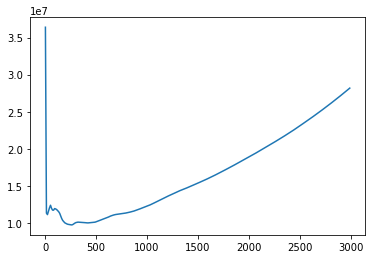

In [56]:
score_series.plot()

In [57]:
print(f"Minimum error was {min_error} at alpha {min_alpha}")

Minimum error was 9705819.81589614 at alpha 261


### part p

**Grid Search:** You decided Linear regression was not good enough and decided to use Support Vector Machines (SVMs). SVMs have many hyper parameters which you may not be familiar with. So you decide to use grid search to find the best set of parameters to use. Using **train_x_e** and **train_y**, run 5-fold grid search CV (set cv=5) using sklearn’s grid search function on sklearn.svm.SVR with the following search parameters:

- Kernel: linear, C: 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0

- Kernel: rbf (radial), C: 1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0 and 

gamma: 0.01, 0.03, 0.1, 0.3, 1.0, 3.0 

Print out the best MSE score and best hyperparameters found. 
 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# run 5-fold grid search CV with parameters param_grid
param_grid = [
        {'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_x_e, train_y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0,
                                3000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [59]:
#best mse score
best_mse = abs(grid_search.best_score_)
print(best_mse)

# best hyperparameters
best_parameters = grid_search.best_params_
print(best_parameters)

9839464.386320233
{'C': 3000.0, 'kernel': 'linear'}
